In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [8]:
def preprocess(df, agrupamento):
    df2 = df.copy()
    df2['DATA'] = df2['DATA'].astype(str)
    if agrupamento == 'Anual':
        df2[agrupamento] = df2['DATA'].apply(lambda x: x[:4])
    elif agrupamento == 'Mensal':
        df2[agrupamento] = df2['DATA'].apply(lambda x: x[:7])
    else:
        df2[agrupamento] = df2['DATA']
        
    
    df2 = df2.groupby([agrupamento]).count().reset_index().rename(columns={'ID': 'Casos'})
    return df2

In [3]:
df = pd.read_csv('../assets/Dados/SINAN-ZIKA.csv')

In [9]:
df = preprocess(df, 'Mensal')

In [12]:
df.head(3)

,Mensal,Casos,DATA,ID_AGRAVO,SEXO,ID_MUNICIP
0,2016-01,37260,37260,37260,37260,37260
1,2016-02,71565,71565,71565,71565,71565
2,2016-03,77624,77624,77624,77624,77624


In [15]:
df = df[['Casos','Mensal']]
df.index.freq = df['Mensal']
del df['Mensal']
arma_mod20 = ARIMA(df, order=(2, 0, 0)).fit()

In [17]:
resid = arma_mod20.resid

In [16]:
print(arma_mod20.params)

const     5.179462e+03
ar.L1     1.632725e+00
ar.L2    -9.556052e-01
sigma2    1.575885e+07
dtype: float64


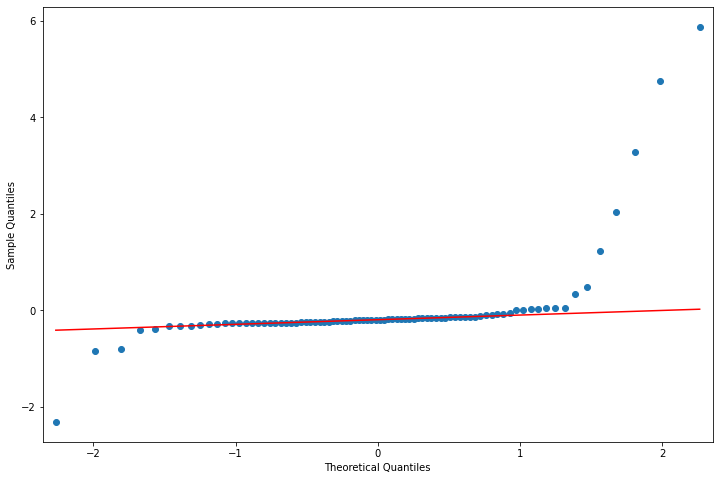

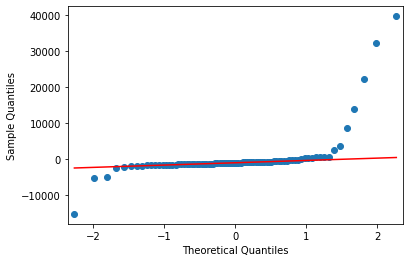

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)
qqplot_data = qqplot(resid, line='q').gca().lines

In [29]:

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Gráfico de resíduos',
    'xaxis': {
        'title': 'Quantis Teóricos',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Quantis da amostra'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})

fig.show()